import matplotlib.pyplot as plt
from matplotlib import style

In [28]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
from matplotlib import style
style.use('ggplot')
from sklearn import preprocessing
colors = 10 * ["g", "r", "c", "b", "k"]


In [29]:
df = pd.read_excel(r"C:\Users\chris\Downloads\default of credit card clients.xlsx")

In [30]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [31]:
x = df
min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0,10))
data_Normalized = min_max_scaler.fit_transform(x)



In [32]:
data_Normalized

array([[0.00000000e+00, 1.01010101e-01, 1.00000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+01],
       [3.33344445e-04, 1.11111111e+00, 1.00000000e+01, ...,
        0.00000000e+00, 3.78310691e-02, 1.00000000e+01],
       [6.66688890e-04, 8.08080808e-01, 1.00000000e+01, ...,
        2.34450647e-02, 9.45776729e-02, 0.00000000e+00],
       ...,
       [9.99933331e+00, 2.02020202e-01, 0.00000000e+00, ...,
        4.68901294e-02, 5.86381572e-02, 1.00000000e+01],
       [9.99966666e+00, 7.07070707e-01, 0.00000000e+00, ...,
        1.24174441e+00, 3.41236244e-02, 1.00000000e+01],
       [1.00000000e+01, 4.04040404e-01, 0.00000000e+00, ...,
        2.34450647e-02, 1.89155346e-02, 1.00000000e+01]])

In [33]:
class Improved_K_Means:

    def __init__(self, k=5, tol=0.001, max_iter=300):

        self.k = k

        self.tol = tol

        self.max_iter = max_iter



    def fit(self, data):


        self.centroids = {}



        for i in range(self.k):

            self.centroids[i] = data[i]



        for i in range(self.max_iter):

            self.classifications = {}



            for i in range(self.k):

                self.classifications[i] = []



            for featureset in data:

                distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]

                classification = distances.index(min(distances))

                self.classifications[classification].append(featureset)



            prev_centroids = dict(self.centroids)



            for classification in self.classifications:

                self.centroids[classification] = np.average(self.classifications[classification], axis=0)



            optimized = True



            for c in self.centroids:

                original_centroid = prev_centroids[c]

                current_centroid = self.centroids[c]

                if np.sum((current_centroid - original_centroid) / original_centroid * 100.0) > self.tol:

                    print(np.sum((current_centroid - original_centroid) / original_centroid * 100.0))

                    optimized = False



            if optimized:

                break



    def predict(self, data):

        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]

        classification = distances.index(min(distances))

        return classification



    def update(self, new_data, delta):

        for featureset in new_data:

            distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]



            if min(distances) < delta:

                classification = distances.index(min(distances))

                self.classifications[classification].append(featureset)

                self.centroids[classification] = np.average(self.classifications[classification], axis=0)

            else:

                self.centroids[self.k] = featureset

                self.classifications[self.k] = []

                self.classifications[self.k].append(featureset)

                self.k = self.k + 1

In [34]:
np.seterr(divide='ignore', invalid='ignore')
run_Clusters = Improved_K_Means()
run_Clusters.fit(data_Normalized)


inf
inf
280.1906095548736
322.088800466446
16.135672871483287


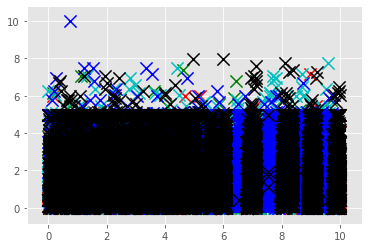

In [35]:
for centroid in run_Clusters.centroids:

    plt.scatter(run_Clusters.centroids[centroid][0], run_Clusters.centroids[centroid][1],

                marker="o", color="k", s=150, linewidths=5)



for classification in run_Clusters.classifications:

    color = colors[classification]

    for featureset in run_Clusters.classifications[classification]:

        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
plt.show()